# Python for Data Analysis - NICOLAS Kevin, YAYA-OYE Ikhlass - DIA1

## Description of the dataset

In [1]:
with open('spambase.DOCUMENTATION','r') as f :
    for line in f.readlines():
        if 'Missing Attribute Values' in line : break
        print(line)
    f.close()

1. Title:  SPAM E-mail Database



2. Sources:

   (a) Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt

        Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304

   (b) Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835

   (c) Generated: June-July 1999



3. Past Usage:

   (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.

   (b) Determine whether a given email is spam or not.

   (c) ~7% misclassification error.

       False positives (marking good mail as spam) are very undesirable.

       If we insist on zero false positives in the training/testing set,

       20-25% of the spam passed through the filter.



4. Relevant Information:

        The "spam" concept is diverse: advertisements for products/web

        sites, make money fast schemes, chain letters, pornography...

	Our collection of spam e-mails came from our postmaster and 

	individuals who had filed spam.  Our collection of non-spam 

	e-mails c

In [2]:
import pandas as pd
import numpy as np

## Import Dataset

In [3]:
# A little function to recuperate the columns names in spambase.names document
with open('spambase.names','r') as f:
    line = f.readline()
    while 'word_freq_make' not in line : line = f.readline()
    features_names = []
    while(line): 
        features_names.append(line.split(':')[0])
        line = f.readline()
    f.close()

features_names.append('spam')

In [4]:
df = pd.read_csv('spambase.data', names=features_names)

In [5]:
df.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


## Analysis of the dataset

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [7]:
df.isnull().values.any()

False

In [8]:
df.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
word_freq_make,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
word_freq_address,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
word_freq_all,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
word_freq_3d,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
word_freq_our,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
word_freq_over,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
word_freq_remove,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
word_freq_internet,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
word_freq_order,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
word_freq_mail,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


In [9]:
df.spam.value_counts(normalize=True)

0    0.605955
1    0.394045
Name: spam, dtype: float64

In [10]:
df[df.spam == 1].describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
word_freq_make,0.152339,0.310645,0.0,0.000,0.000,0.170,4.540
word_freq_address,0.164650,0.348919,0.0,0.000,0.000,0.210,4.760
word_freq_all,0.403795,0.480725,0.0,0.000,0.300,0.640,3.700
word_freq_3d,0.164672,2.219087,0.0,0.000,0.000,0.000,42.810
word_freq_our,0.513955,0.707195,0.0,0.000,0.290,0.780,7.690
word_freq_over,0.174876,0.321927,0.0,0.000,0.000,0.240,2.540
word_freq_remove,0.275405,0.572110,0.0,0.000,0.000,0.340,7.270
word_freq_internet,0.208141,0.544864,0.0,0.000,0.000,0.190,11.110
word_freq_order,0.170061,0.354804,0.0,0.000,0.000,0.190,3.330
word_freq_mail,0.350507,0.631384,0.0,0.000,0.000,0.510,7.550


In [11]:
df[df.spam == 0].describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
word_freq_make,0.073479,0.297838,0.0,0.000,0.0000,0.0000,4.340
word_freq_address,0.244466,1.633223,0.0,0.000,0.0000,0.0000,14.280
word_freq_all,0.200581,0.502959,0.0,0.000,0.0000,0.1200,5.100
word_freq_3d,0.000886,0.021334,0.0,0.000,0.0000,0.0000,0.870
word_freq_our,0.181040,0.614521,0.0,0.000,0.0000,0.0000,10.000
word_freq_over,0.044544,0.222888,0.0,0.000,0.0000,0.0000,5.880
word_freq_remove,0.009383,0.110467,0.0,0.000,0.0000,0.0000,3.070
word_freq_internet,0.038415,0.247238,0.0,0.000,0.0000,0.0000,5.880
word_freq_order,0.038049,0.198517,0.0,0.000,0.0000,0.0000,5.260
word_freq_mail,0.167170,0.643197,0.0,0.000,0.0000,0.0000,18.180


## Somes plots and visualizations

In [12]:
import matplotlib.pyplot as plt
#import matplotlib.colors as colors
import seaborn as sns

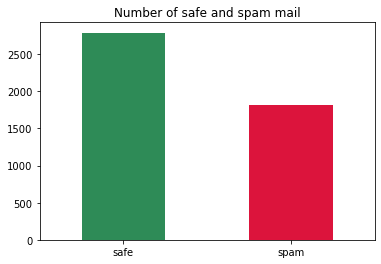

In [13]:
df.spam.value_counts().plot(kind='bar', color=['seagreen','crimson'])
plt.xticks([0,1],['safe','spam'],rotation=0)
plt.title('Number of safe and spam mail')
plt.axis()
plt.show()

### Scatterplot

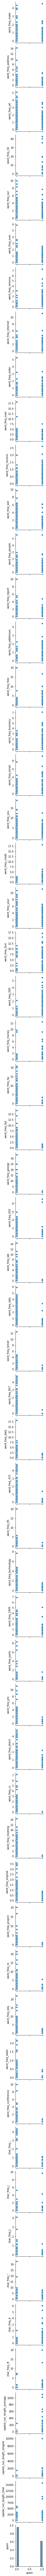

In [14]:
sns.pairplot(df, x_vars=['spam'], y_vars = df.columns)
# A bit complicate to analyse

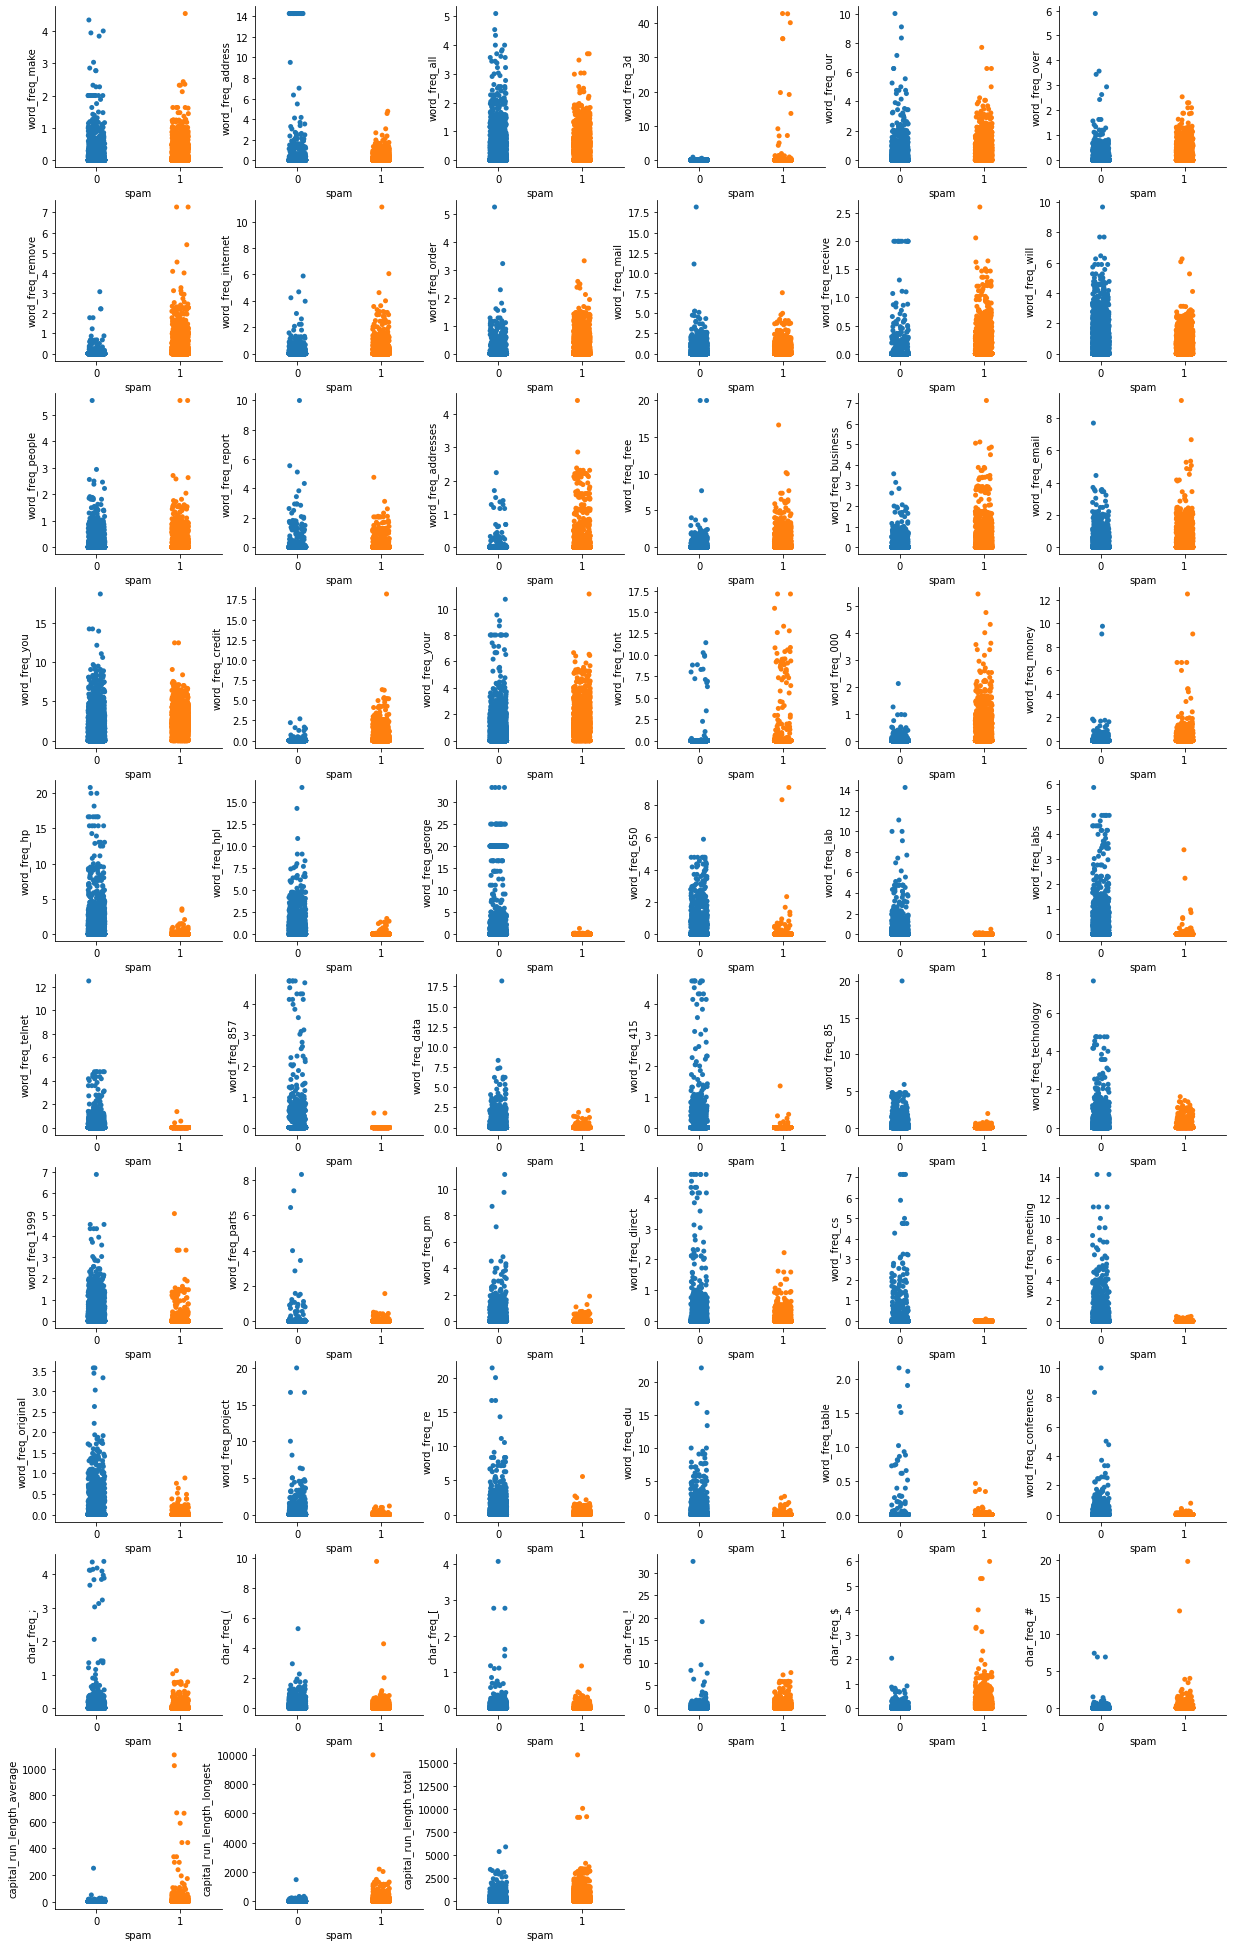

In [15]:
# A better scatterplot visualization
fig_, axes = plt.subplots(figsize=(21, 35), ncols=6, nrows=10)
for i in range(df.shape[1]-1):
    sns.stripplot(ax=axes[i//6,i%6], x='spam', y=df.columns[i], data=df)
    axes[i//6,i%6].spines['right'].set_visible(False)
    axes[i//6,i%6].spines['top'].set_visible(False)
fig_.delaxes(axes[9,3])
fig_.delaxes(axes[9,4])
fig_.delaxes(axes[9,5])

### Boxplot

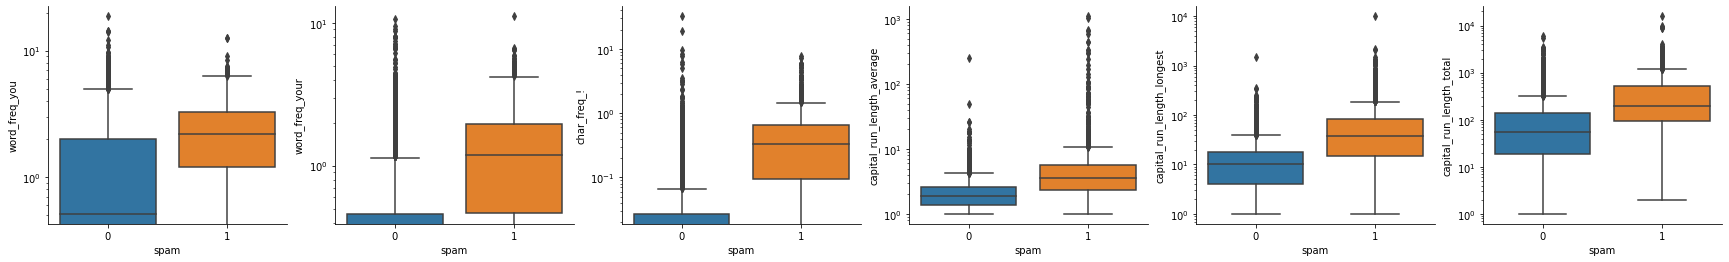

In [16]:
fig_, axes = plt.subplots(figsize=(30, 4), ncols=6, nrows=1)
boxplot_selected = ['word_freq_you','word_freq_your','char_freq_!','capital_run_length_average',
                    'capital_run_length_longest','capital_run_length_total']
for i in range(6):
    sns.boxplot(ax=axes[i], x='spam', y=boxplot_selected[i], data=df)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].set(yscale="log")

### Barplot

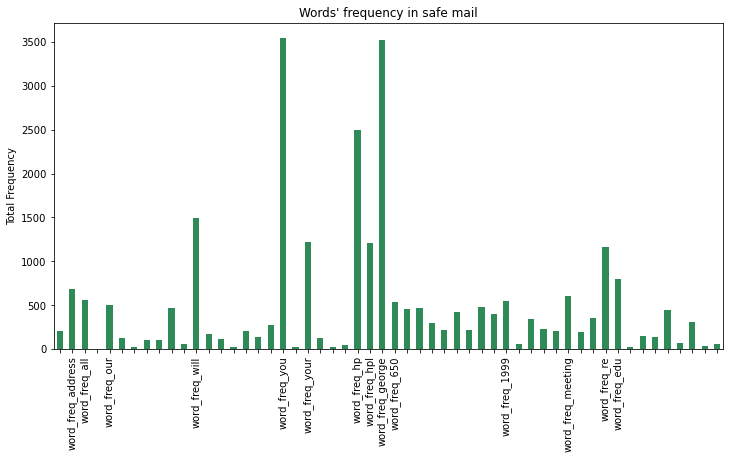

In [17]:
fig = plt.figure(figsize=(12,6))
df[df['spam']==0].iloc[:,:54].sum().plot(kind='bar', color='seagreen')
plt.title("Words' frequency in safe mail")
x_ticks_label =[x if df[df['spam']==0].loc[:,x].sum() > 500 else None for x in df.columns[:54]]
plt.ylabel('Total Frequency')
plt.xticks(np.arange(54),x_ticks_label)
plt.show()

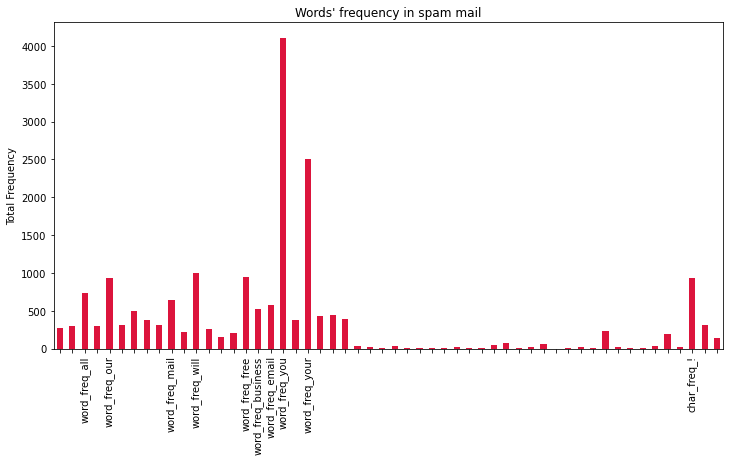

In [18]:
fig = plt.figure(figsize=(12,6))
df[df['spam']==1].iloc[:,:54].sum().plot(kind='bar', color='crimson')
plt.title("Words' frequency in spam mail")
x_ticks_label =[x if df[df['spam']==1].loc[:,x].sum() > 500 else None for x in df.columns[:54]]
plt.ylabel('Total Frequency')
plt.xticks(np.arange(54),x_ticks_label)
plt.show()

### Correlation 

In [19]:
correlation_matrix = df.corr()

<AxesSubplot:>

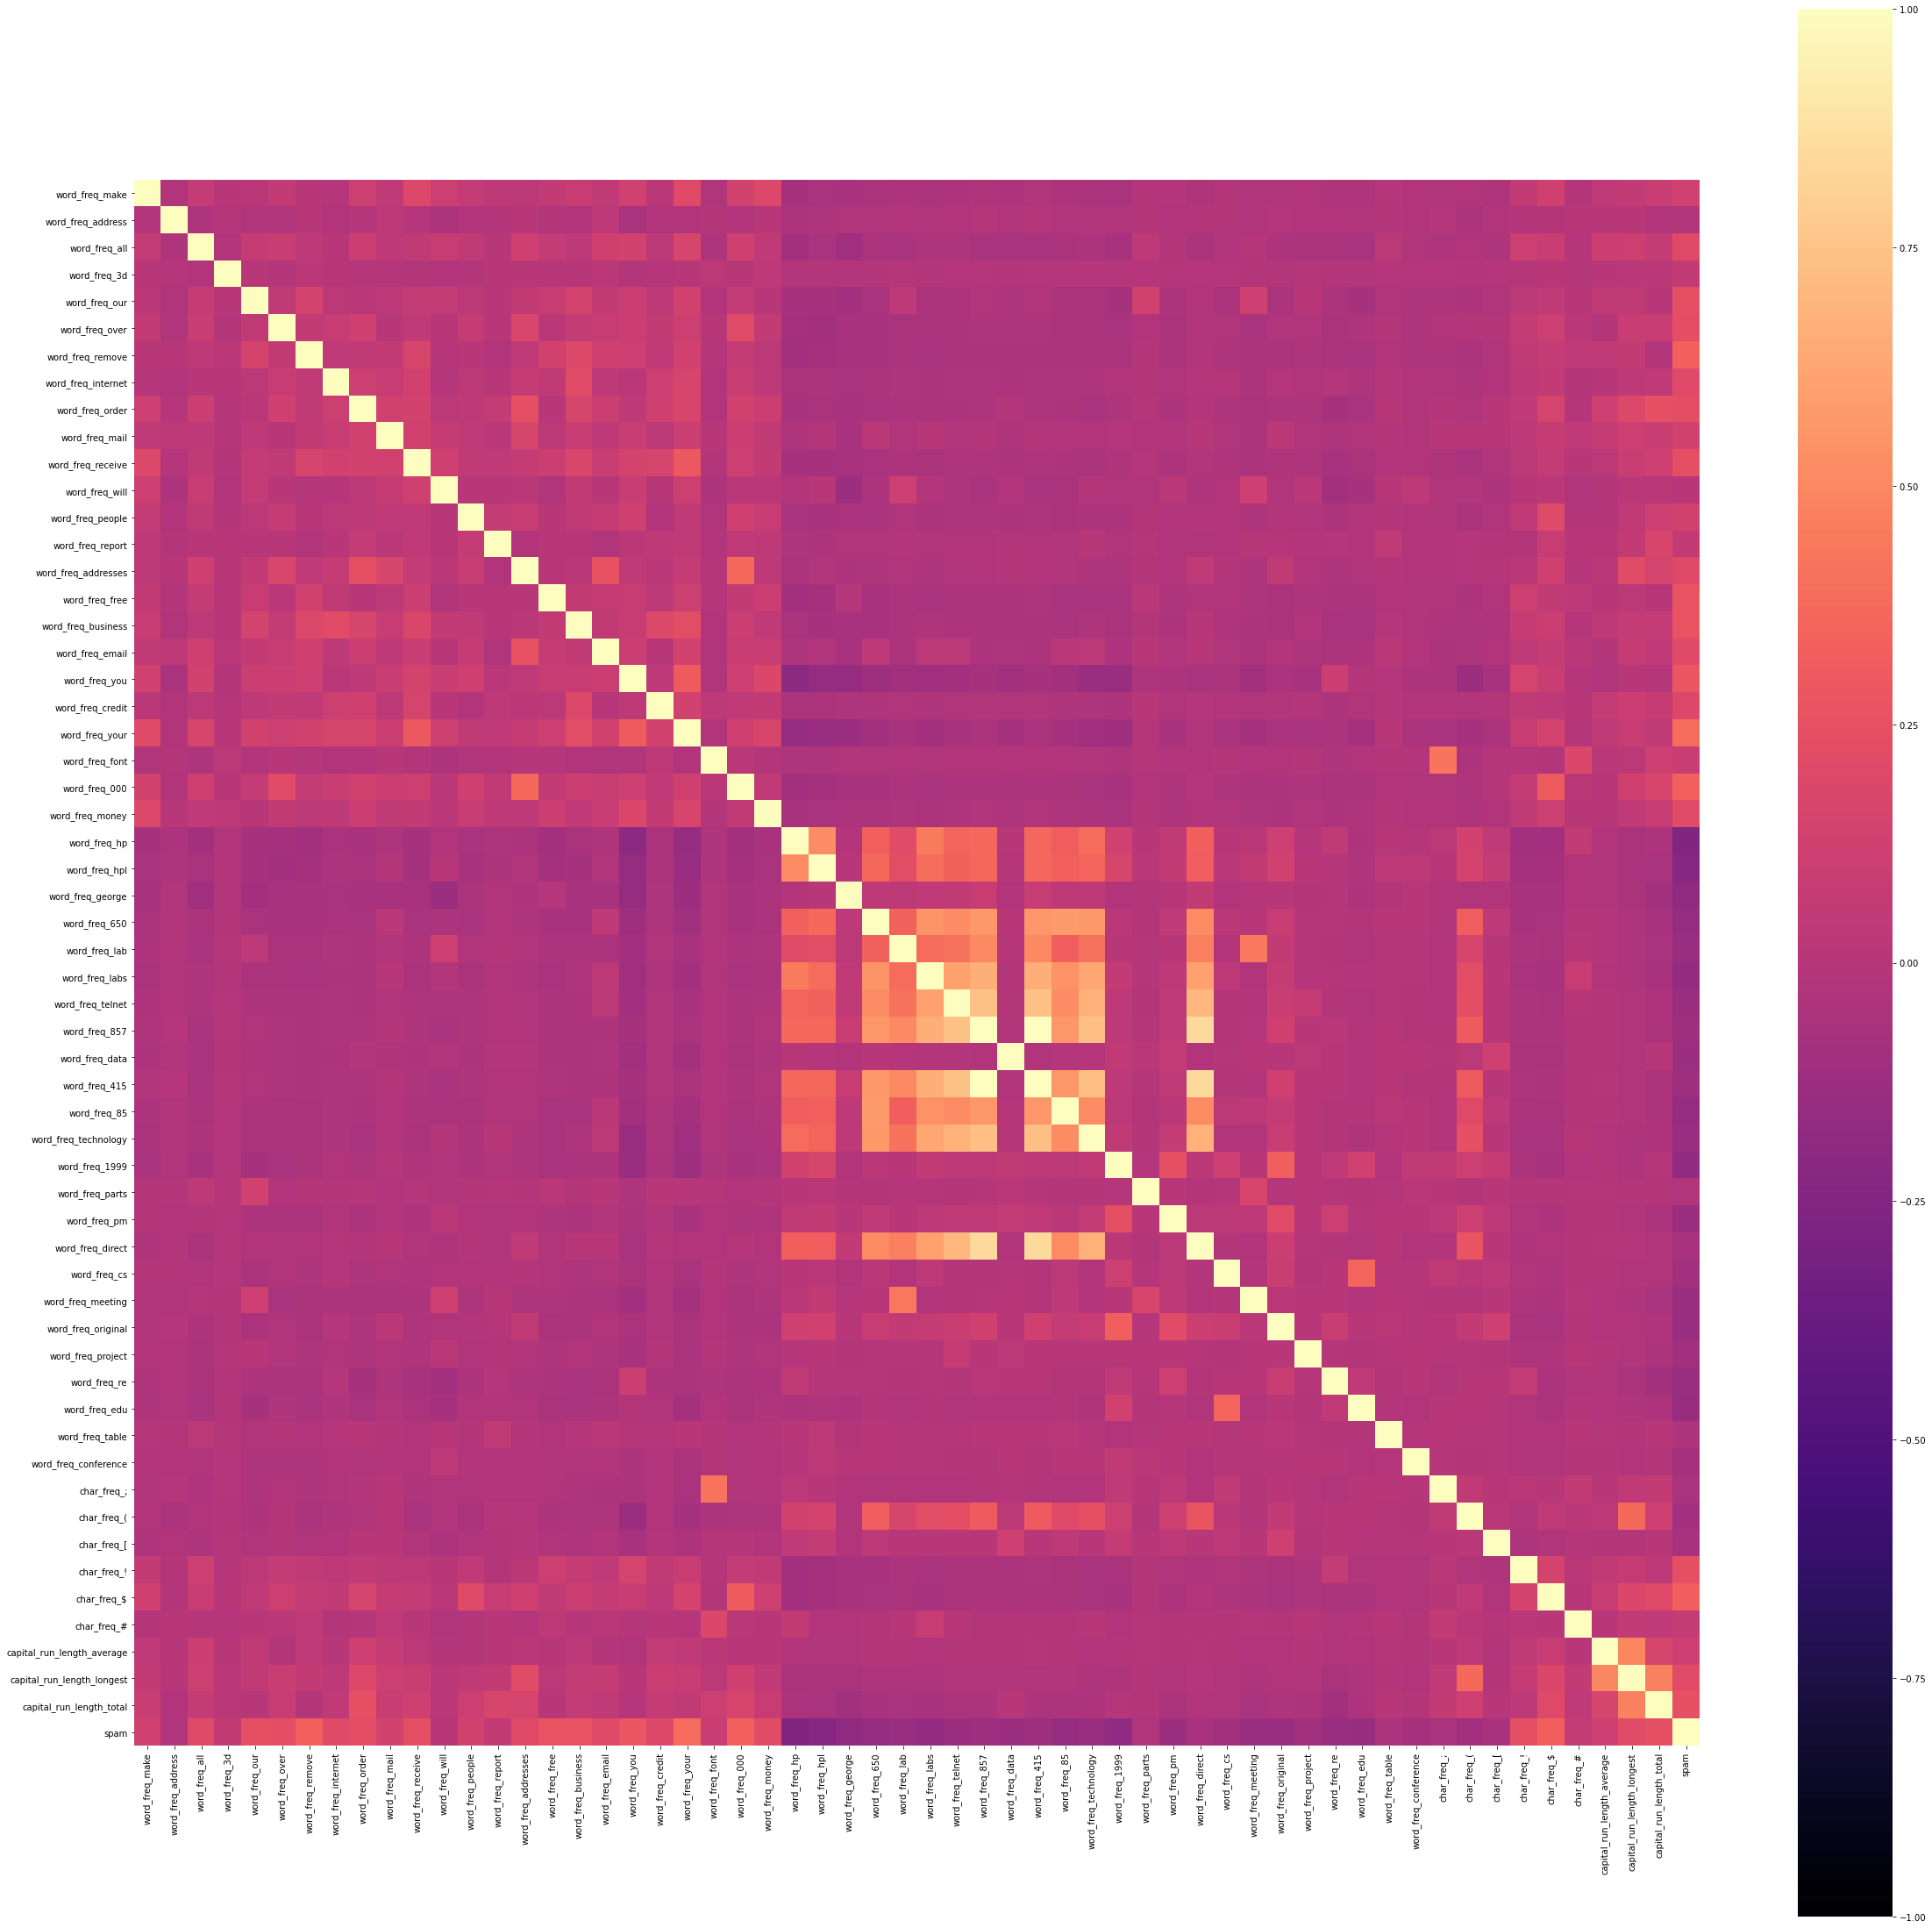

In [20]:
fig = plt.figure(figsize=(40,40))
sns.heatmap(correlation_matrix, cmap ="magma", vmin=-1, square=True,)

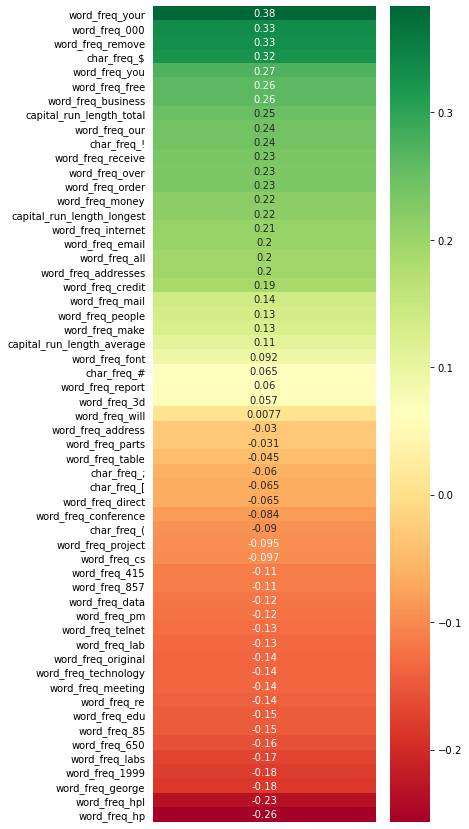

In [21]:
fig = plt.figure(figsize=(5,15))
corr_spam = correlation_matrix.spam.sort_values(ascending=False)
corr_spam.drop('spam',inplace=True)
ax = sns.heatmap(corr_spam.values.reshape((-1,1)), cmap ='RdYlGn', annot=True, 
                 xticklabels=False, yticklabels=corr_spam.index)
ax.tick_params(left=False)

In [22]:
threshold = 0.11
selected_features = corr_spam[(corr_spam < -threshold) | (corr_spam > threshold)].index
len(selected_features)

41

## Preprocessing Data

In [23]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

In [24]:
X = df.drop('spam', axis=1).copy()
Y = df.spam.copy()
print(X.shape)
print(Y.shape)

(4601, 57)
(4601,)


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=10)
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(X[selected_features],Y, random_state=10)
print('Training set with all features shape: {}'.format(X_train.shape))
print('Testing set with all features shape: {}\n'.format(X_test.shape))
print('Training set with selected features shape: {}'.format(X_train_s.shape))
print('Testing set with selected features shape: {}\n'.format(X_test_s.shape))
print('Training set with target value shape: {}'.format(Y_train.shape))
print('Testing set with target value shape: {}'.format(Y_test.shape))

Training set with all features shape: (3450, 57)
Testing set with all features shape: (1151, 57)

Training set with selected features shape: (3450, 41)
Testing set with selected features shape: (1151, 41)

Training set with target value shape: (3450,)
Testing set with target value shape: (1151,)


In [26]:
# WE FIRST TRY TO SCALE BUT AT THE END WE CONSTATE THAT IT WAS NOT IMPORTANT FOR US AND IT WOULD BE A PROBLEM TO
# PREDICT ON REAL WORLD DATA
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#X_train_selected_scaled = scaler.fit_transform(X_train_s)
#X_test_selected_scaled = scaler.transform(X_test_s)

## Machine Learning models

In [27]:
from sklearn.metrics import accuracy_score, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.

In [28]:
list_models_name = []
list_models = []
list_precision = {'all' : [], 'selected' : []}
list_accuracy = {'all' : [], 'selected' : []}

### Logistic Regression

In [29]:
lr_model = LogisticRegression(max_iter= 2000, random_state=10)
lr_model_s = LogisticRegression(max_iter= 2000, random_state=10)

In [30]:
lr_model.fit(X_train, Y_train)
lr_model_s.fit(X_train_s, Y_train_s)

LogisticRegression(max_iter=2000, random_state=10)

In [31]:
print(lr_model.score(X_train, Y_train))
print(lr_model.score(X_test, Y_test))
print(lr_model_s.score(X_train_s, Y_train))
print(lr_model_s.score(X_test_s, Y_test))

0.9269565217391305
0.9339704604691572
0.9191304347826087
0.9244135534317984


In [32]:
print(precision_score(Y_test,lr_model.predict(X_test)))
print(precision_score(Y_test,lr_model_s.predict(X_test_s)))

0.9280898876404494
0.9282407407407407


In [33]:
list_models_name.append('Logistic Regression')
list_models.append(lr_model)

### Random Forest

In [34]:
random_model = RandomForestClassifier(random_state=10)
list_models_name.append('Random Forest')
list_models.append(random_model)

In [35]:
random_model.fit(X_train, Y_train)
precision_score(Y_test,random_model.predict(X_test))

0.9575892857142857

### Gradient Boosting

In [36]:
boosting_model = GradientBoostingClassifier(random_state=10)
list_models_name.append('Gradient Boosting')
list_models.append(boosting_model)

### SVC

In [37]:
svc_model = SVC(random_state=10)
list_models_name.append('SVC')
list_models.append(svc_model)

## Fitting and computation

In [38]:
for model in list_models:
    model.fit(X_train, Y_train)
    list_accuracy['all'].append(model.score(X_test, Y_test))
    list_precision['all'].append(precision_score(Y_test,model.predict(X_test)))
    
    model.fit(X_train_s, Y_train)
    list_accuracy['selected'].append(model.score(X_test_s, Y_test))
    list_precision['selected'].append(precision_score(Y_test,model.predict(X_test_s)))

In [39]:
for i in range(len(list_models)):
    print(list_models_name[i])
    print('Accuracy -> all : {} vs selected : {}'.format(list_accuracy['all'][i],list_accuracy['selected'][i]))
    print('Precision -> all : {} vs selected : {}'.format(list_precision['all'][i],list_precision['selected'][i]))
    print()

Logistic Regression
Accuracy -> all : 0.9339704604691572 vs selected : 0.9244135534317984
Precision -> all : 0.9280898876404494 vs selected : 0.9282407407407407

Random Forest
Accuracy -> all : 0.9591659426585578 vs selected : 0.9609035621198957
Precision -> all : 0.9575892857142857 vs selected : 0.963963963963964

Gradient Boosting
Accuracy -> all : 0.9574283231972198 vs selected : 0.9530842745438749
Precision -> all : 0.9615384615384616 vs selected : 0.9548532731376975

SVC
Accuracy -> all : 0.7193744569939183 vs selected : 0.7185056472632494
Precision -> all : 0.7445255474452555 vs selected : 0.7435897435897436



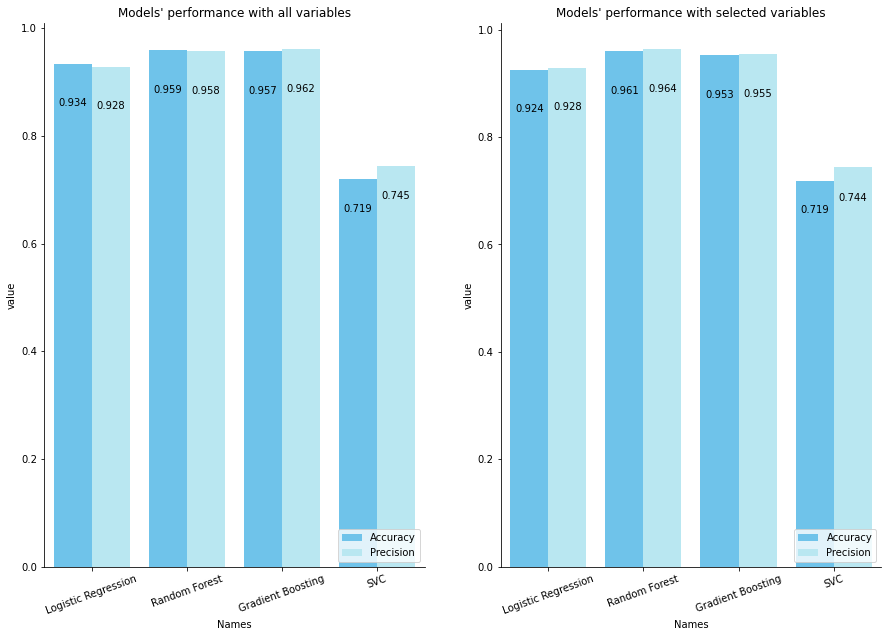

In [40]:
df_plot_1 = pd.DataFrame(data=zip(list_models_name,list_accuracy['all'], list_precision['all']), 
                         columns = ['Names','Accuracy','Precision'])
df_plot_2 = pd.DataFrame(data=zip(list_models_name, list_accuracy['selected'], list_precision['selected']),
                         columns = ['Names','Accuracy','Precision'])

flatui = ["#5acbff","#b0edfa"]

fig, axes = plt.subplots(figsize=(15, 10), ncols=2, nrows=1)
sns.barplot(x='Names', y='value', hue='variable', data=df_plot_1.melt(id_vars='Names'), ax=axes[0], palette = flatui)
sns.barplot(x='Names', y='value', hue='variable', data=df_plot_2.melt(id_vars='Names'), ax=axes[1], palette = flatui)

axes[0].set_title("Models' performance with all variables")
axes[1].set_title("Models' performance with selected variables")

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticklabels(labels =list_models_name, rotation = 20)
    ax.legend(loc='lower right')
    
    for p in ax.patches:
        h = p.get_height()
        ax.text(p.get_x() + (p.get_width()/2), h*2.75/3, '{}'.format(round(h,3)), ha='center', color='black')

## Random Forest Tuning

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [42]:
random_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=10)

In [43]:
random_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

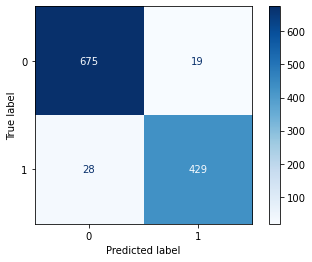

In [44]:
cm = confusion_matrix(Y_test, random_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

In [45]:
param_grid = {
    'bootstrap': [True],
    'criterion': ['gini','entropy'],
    'oob_score': [True],
    'max_depth': [20, 35, 50, 70],
    'max_features': ['sqrt'],
    'n_estimators': [75, 100, 200, 300, 500]
}

In [46]:
grid_search = GridSearchCV(estimator = random_model, scoring = ['accuracy','precision'], param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, refit='precision')

In [47]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 35, 50, 70],
                         'max_features': ['sqrt'],
                         'n_estimators': [75, 100, 200, 300, 500],
                         'oob_score': [True]},
             refit='precision', scoring=['accuracy', 'precision'], verbose=2)

In [48]:
best_rf = grid_search.best_estimator_

In [49]:
grid_search.best_score_

0.9509444052150583

In [50]:
params = grid_search.best_params_
params

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 35,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'oob_score': True}

In [51]:
best_rf.score(X_test, Y_test)

0.9652476107732406

In [52]:
precision_score(Y_test,best_rf.predict(X_test))

0.9685393258426966

In [53]:
best_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 35,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

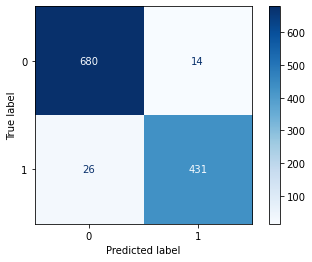

In [54]:
cm = confusion_matrix(Y_test, best_rf.predict(X_test))
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

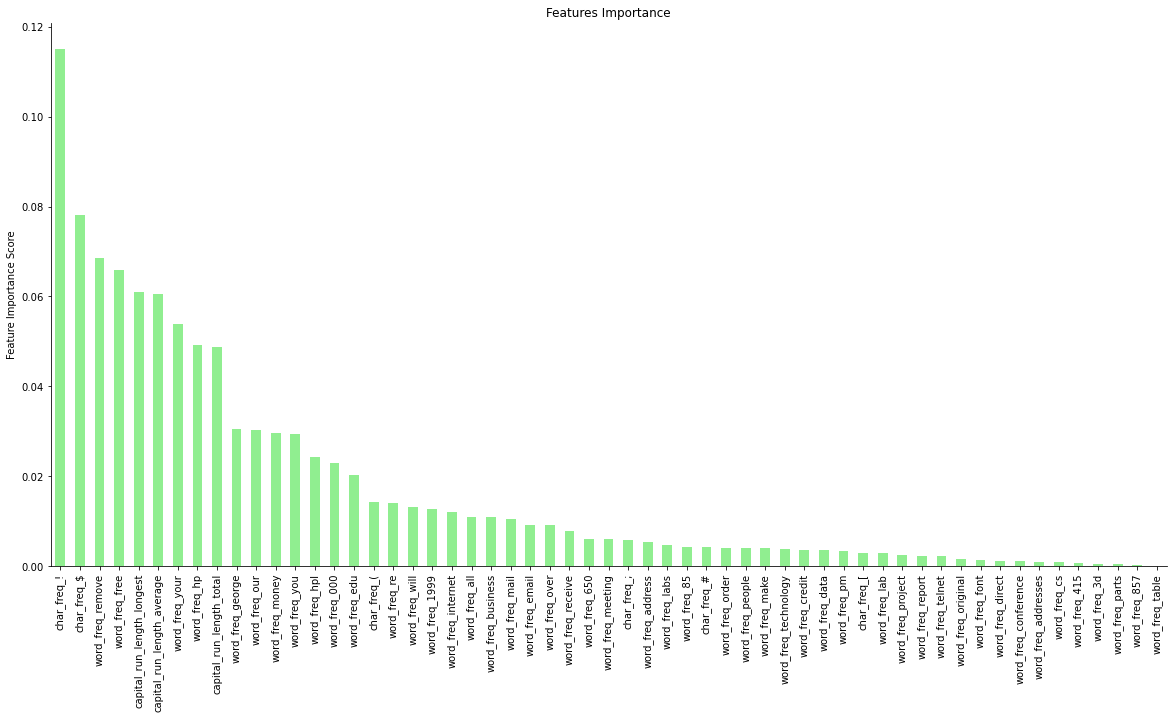

In [55]:
fig, ax1= plt.subplots(figsize=(20, 10), nrows=1, ncols=1)

feat_imp = pd.Series(best_rf.feature_importances_, X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Features Importance', color='lightgreen')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.ylabel('Feature Importance Score')
plt.show()

### Features selections (importance)

In [56]:
from sklearn.feature_selection import SelectFromModel

In [57]:
selector = SelectFromModel(estimator=best_rf).fit(X_train, Y_train)

In [58]:
important_features = np.array(df.columns[:57][selector.get_support()])

In [59]:
final_X_train = X_train[important_features]
final_X_test = X_test[important_features]

In [60]:
print(important_features)
print("We are now using {} features.".format(len(important_features)))

['word_freq_our' 'word_freq_remove' 'word_freq_free' 'word_freq_you'
 'word_freq_your' 'word_freq_000' 'word_freq_money' 'word_freq_hp'
 'word_freq_hpl' 'word_freq_george' 'word_freq_edu' 'char_freq_!'
 'char_freq_$' 'capital_run_length_average' 'capital_run_length_longest'
 'capital_run_length_total']
We are now using 16 features.


In [61]:
best_rf.fit(final_X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=35, max_features='sqrt',
                       n_estimators=500, oob_score=True, random_state=10)

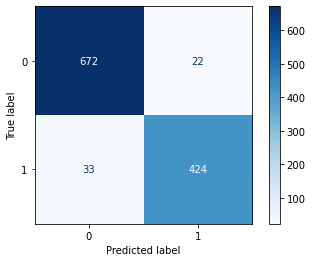

In [62]:
cm = confusion_matrix(Y_test, best_rf.predict(final_X_test))
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

In [63]:
precision_score(Y_test,best_rf.predict(final_X_test))

0.9506726457399103

### (selected)

In [64]:
best_rf.fit(X_train_s,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=35, max_features='sqrt',
                       n_estimators=500, oob_score=True, random_state=10)

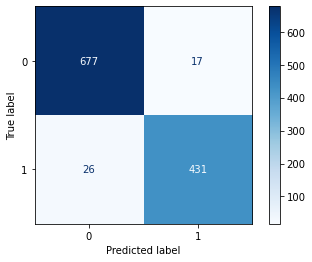

In [65]:
cm = confusion_matrix(Y_test, best_rf.predict(X_test_s))
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

In [66]:
precision_score(Y_test,best_rf.predict(X_test_s))

0.9620535714285714

### Save the model

In [67]:
from joblib import dump, load
best_rf.fit(X_train,Y_train)

dump(best_rf, 'model_saved.joblib')

['model_saved.joblib']

## Text to individual

In [71]:
import re
from collections import Counter

In [72]:
def text_to_ind(text):
    all_variables = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses', 'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000', 'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857', 'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu', 'table', 'conference', ';', '(', '[', '!', '$', '#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']
    dic = {}
    text_split = re.split(r'\W+', text)
    text_split_count = Counter(text_split)
    for i in range(48):
        if all_variables[i] in text_split_count.keys() : dic[all_variables[i]] = 100*text_split_count[all_variables[i]]/len(text_split)
        else : dic[all_variables[i]] = float(0)
            
    for i in range(48,54):
        dic[all_variables[i]] = 100*text.count(all_variables[i])/(len(text)- text.count(' '))
    
    all_uppercase_sequence = re.findall(r"[A-Z]+", text)
    sum_uppercase = 0
    
    for sequence in all_uppercase_sequence:
        sum_uppercase += len(sequence)
    
    dic['capital_run_length_average'] = sum_uppercase/len(all_uppercase_sequence)
    dic['capital_run_length_longest'] = len(max(all_uppercase_sequence, key=len))
    dic['capital_run_length_total'] = sum_uppercase
    
    return np.array(list(dic.values())).reshape(1,-1)
    

In [73]:
text = 'You win 100 000 $!!! REMOVE ALL your debts in the AtM for free! $$$$$ I REPeAT 100 000 000 $!!'
load('model_saved.joblib').predict(text_to_ind(text))[0]

1